In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/PD__dataset.csv')


In [ ]:
# Features (X)
X = data[['SpO2', 'Dopamine', 'Alpha_Synuclein']].values

# Target variable (y) including both choking and fall detection
y = data[['choking', 'Fall_Detected']].values

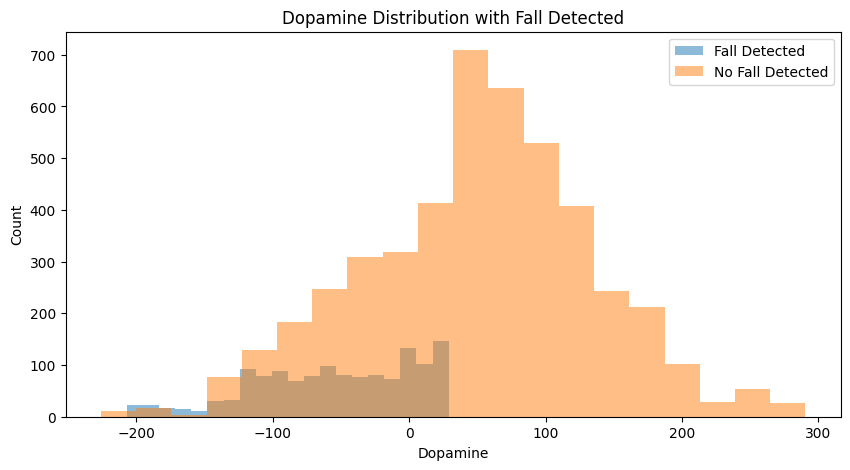

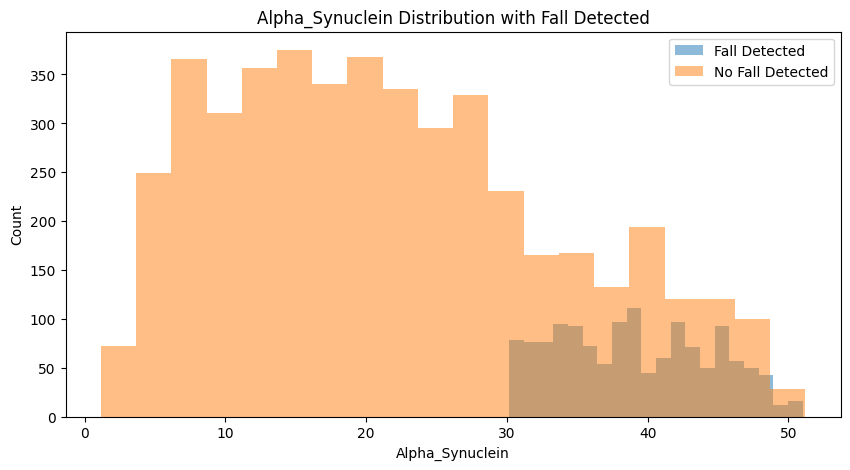

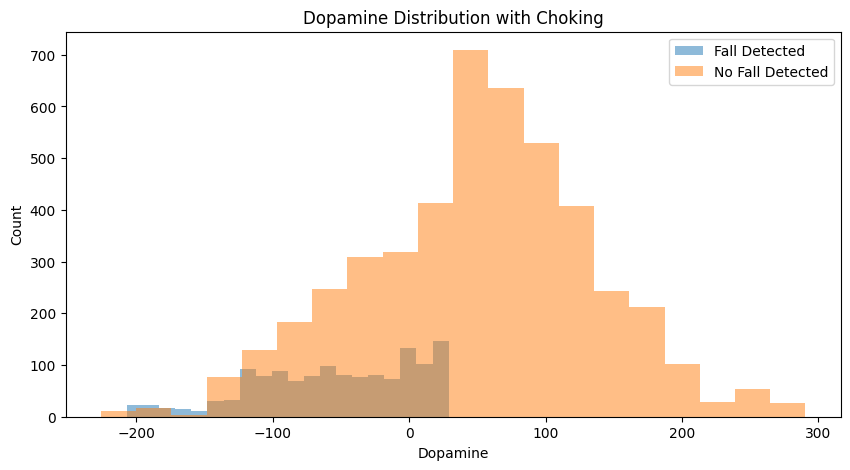

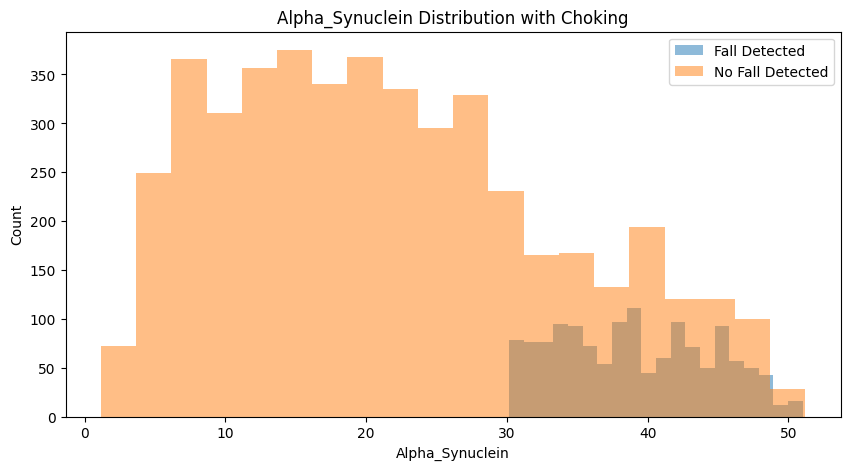

In [ ]:
import matplotlib.pyplot as plt

def create_histogram(data, feature, title):
    plt.figure(figsize=(10, 5))
    bins = 20  # Adjust the number of bins as needed
    plt.hist(data[data['Fall_Detected'] == 1][feature], bins=bins, alpha=0.5, label='Fall Detected')
    plt.hist(data[data['Fall_Detected'] == 0][feature], bins=bins, alpha=0.5, label='No Fall Detected')
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Dopamine distribution with Fall_Detected
create_histogram(data, 'Dopamine', 'Dopamine Distribution with Fall Detected')

# Alpha_Synuclein distribution with Fall_Detected
create_histogram(data, 'Alpha_Synuclein', 'Alpha_Synuclein Distribution with Fall Detected')

# Dopamine distribution with Choking
create_histogram(data, 'Dopamine', 'Dopamine Distribution with Choking')

# Alpha_Synuclein distribution with Choking
create_histogram(data, 'Alpha_Synuclein', 'Alpha_Synuclein Distribution with Choking')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare data for both choking and fall detection
X_choking = data[['Dopamine', 'Alpha_Synuclein', 'SpO2']]
y_choking = data['choking']
X_fall = data[['Dopamine', 'Alpha_Synuclein', 'Gyrometer_X']]
y_fall = data['Fall_Detected']

# Split data into train and test sets for choking prediction
X_train_choking, X_test_choking, y_train_choking, y_test_choking = train_test_split(
    X_choking, y_choking, test_size=0.2, random_state=42
)

# Split data into train and test sets for fall detection prediction
X_train_fall, X_test_fall, y_train_fall, y_test_fall = train_test_split(
    X_fall, y_fall, test_size=0.2, random_state=42
)

# Initialize and train a logistic regression model for choking prediction
clf_choking = LogisticRegression(max_iter=1000, random_state=42)
clf_choking.fit(X_train_choking, y_train_choking)

# Initialize and train a logistic regression model for fall detection prediction
clf_fall = LogisticRegression(max_iter=1000, random_state=42)
clf_fall.fit(X_train_fall, y_train_fall)

# Get accuracy for both tasks
accuracy_choking = clf_choking.score(X_test_choking, y_test_choking)
accuracy_fall = clf_fall.score(X_test_fall, y_test_fall)

print(f'Final Test Accuracy for Choking: {accuracy_choking:.4f}')
print(f'Final Test Accuracy for Fall Detection: {accuracy_fall:.4f}')

Final Test Accuracy for Choking: 0.9017
Final Test Accuracy for Fall Detection: 0.9308


Final Test Accuracy for Choking: 0.9017
Final Test Accuracy for Fall Detection: 0.9308


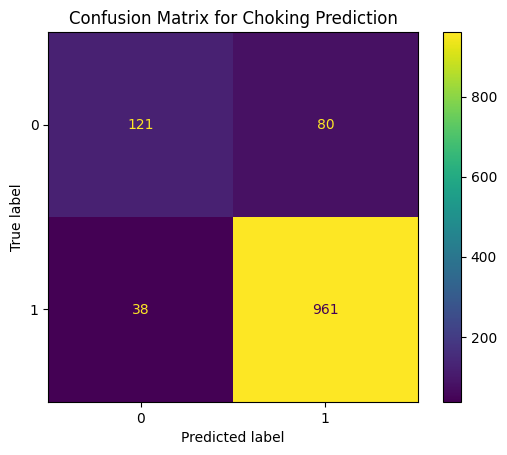

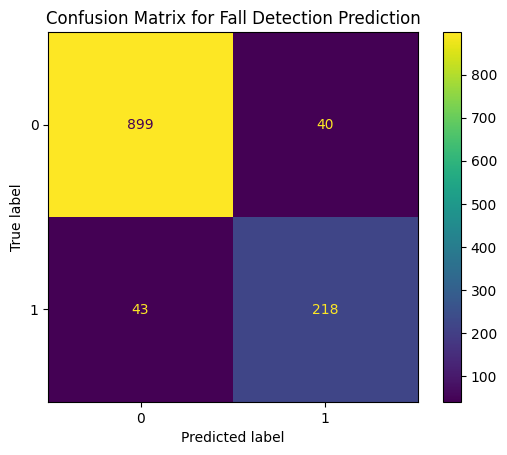

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prepare data for both choking and fall detection
X_choking = data[['Dopamine', 'Alpha_Synuclein', 'SpO2']]
y_choking = data['choking']
X_fall = data[['Dopamine', 'Alpha_Synuclein', 'Gyrometer_X']]
y_fall = data['Fall_Detected']

# Split data into train and test sets for choking prediction
X_train_choking, X_test_choking, y_train_choking, y_test_choking = train_test_split(
    X_choking, y_choking, test_size=0.2, random_state=42
)

# Split data into train and test sets for fall detection prediction
X_train_fall, X_test_fall, y_train_fall, y_test_fall = train_test_split(
    X_fall, y_fall, test_size=0.2, random_state=42
)

# Initialize and train a logistic regression model for choking prediction
clf_choking = LogisticRegression(max_iter=1000, random_state=42)
clf_choking.fit(X_train_choking, y_train_choking)

# Initialize and train a logistic regression model for fall detection prediction
clf_fall = LogisticRegression(max_iter=1000, random_state=42)
clf_fall.fit(X_train_fall, y_train_fall)

# Get accuracy for both tasks
accuracy_choking = clf_choking.score(X_test_choking, y_test_choking)
accuracy_fall = clf_fall.score(X_test_fall, y_test_fall)

print(f'Final Test Accuracy for Choking: {accuracy_choking:.4f}')
print(f'Final Test Accuracy for Fall Detection: {accuracy_fall:.4f}')

# Calculate confusion matrix for choking prediction
y_pred_choking = clf_choking.predict(X_test_choking)
conf_matrix_choking = confusion_matrix(y_test_choking, y_pred_choking)

# Calculate confusion matrix for fall detection prediction
y_pred_fall = clf_fall.predict(X_test_fall)
conf_matrix_fall = confusion_matrix(y_test_fall, y_pred_fall)

# Display confusion matrix for choking prediction
disp_choking = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_choking)
disp_choking.plot()
plt.title('Confusion Matrix for Choking Prediction')
plt.show()

# Display confusion matrix for fall detection prediction
disp_fall = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_fall)
disp_fall.plot()
plt.title('Confusion Matrix for Fall Detection Prediction')
plt.show()


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.0 MB/s eta 0:00:00


In [ ]:
import shap
# Initialize SHAP explainer for choking prediction
explainer_choking = shap.Explainer(clf_choking, X_train_choking)

# Choose a sample from the test set to explain for choking prediction
sample_idx_choking = 0  # You can choose any sample index
sample_choking = X_test_choking.iloc[sample_idx_choking]

# Generate SHAP explanation for choking prediction
shap_values_choking = explainer_choking.shap_values(sample_choking)

# Get model's prediction on the background dataset for choking prediction
background_pred_choking = clf_choking.predict_proba(X_train_choking)

# Compute the base value for choking prediction
base_value_choking = np.mean(background_pred_choking[:, 1])  # Assuming it's a binary classification model

# Create an Explanation object for choking prediction
shap_explanation_choking = shap.Explanation(values=shap_values_choking, base_values=base_value_choking, data=sample_choking)

# Plot the explanation for choking prediction
shap.plots.waterfall(shap_explanation_choking, show=False)
plt.title('SHAP Explanation for Choking Prediction')
plt.savefig('shap_explanation_choking.png')
plt.close()

# Initialize SHAP explainer for fall detection prediction
explainer_fall = shap.Explainer(clf_fall, X_train_fall)

# Choose a sample from the test set to explain for fall detection prediction
sample_idx_fall = 0  # You can choose any sample index
sample_fall = X_test_fall.iloc[sample_idx_fall]

# Generate SHAP explanation for fall detection prediction
shap_values_fall = explainer_fall.shap_values(sample_fall)

# Get model's prediction on the background dataset for fall detection prediction
background_pred_fall = clf_fall.predict_proba(X_train_fall)

# Compute the base value for fall detection prediction
base_value_fall = np.mean(background_pred_fall[:, 1])  # Assuming it's a binary classification model

# Create an Explanation object for fall detection prediction
shap_explanation_fall = shap.Explanation(values=shap_values_fall, base_values=base_value_fall, data=sample_fall)

# Plot the explanation for fall detection prediction
shap.plots.waterfall(shap_explanation_fall, show=False)
plt.title('SHAP Explanation for Fall Detection Prediction')
plt.savefig('shap_explanation_fall.png')
plt.close()

In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage
import os

def send_email(subject, body, attachment_path, to_email):
    # Email credentials (replace with your own)
    smtp_server = 'smtp.gmail.com'
    smtp_port = 587
    smtp_username = 'snehaaa.bhat@gmail.com'
    smtp_password = 'mmzi atsz ebtd jmyi'
    to_email = 'snehaaa.bhat@gmail.com'


    # Create message
    msg = MIMEMultipart()
    msg['From'] = smtp_username
    msg['To'] = to_email
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    # Attach SHAP explanation image
    if os.path.exists(attachment_path):
        with open(attachment_path, 'rb') as attachment:
            image_data = attachment.read()
            msg_attachment = MIMEImage(image_data)
            msg_attachment.add_header('Content-Disposition', 'attachment', filename=os.path.basename(attachment_path))
            msg.attach(msg_attachment)
    else:
        print(f"Error: Attachment {attachment_path} not found.")
        return  # Exit function if attachment not found

    # Connect to SMTP server and send email
    with smtplib.SMTP(smtp_server, smtp_port) as server:
        server.starttls()
        server.login(smtp_username, smtp_password)
        server.sendmail(smtp_username, to_email, msg.as_string())

# Example usage for fall prediction alert
subject_fall = 'Fall Prediction Alert'
body_fall = 'A fall event has been predicted. Please take immediate action.\n\nExplanation attached.'
attachment_path_fall = '/content/shap_explanation_fall.png'
to_email = 'snehaaa.bhat@gmail.com'

send_email(subject_fall, body_fall, attachment_path_fall, to_email)

# Example usage for choking prediction alert
subject_choking = 'Choking Prediction Alert'
body_choking = 'A choking event has been predicted. Please take immediate action.\n\nExplanation attached.'
attachment_path_choking = '/content/shap_explanation_choking.png'
to_email = 'snehaaa.bhat@gmail.com'

send_email(subject_choking, body_choking, attachment_path_choking, to_email)
print("Prediction email sent successfully")


Prediction email sent successfully


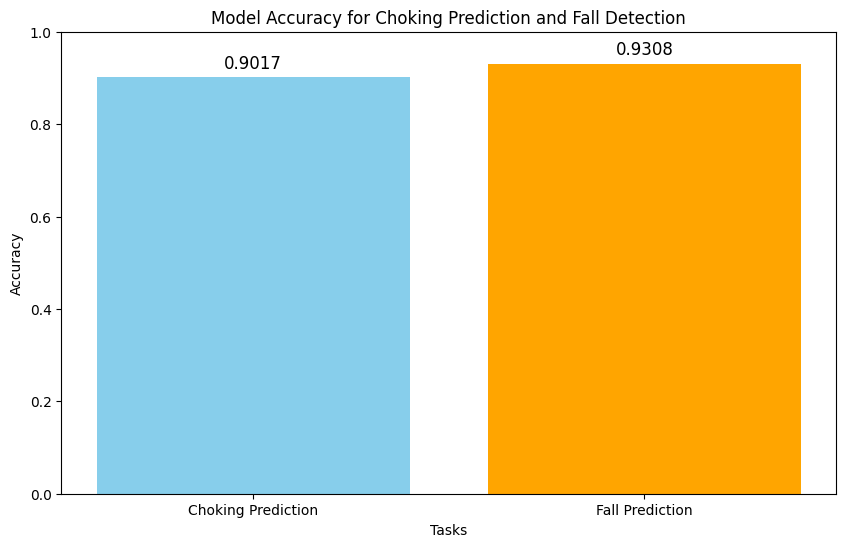

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for each model
accuracies = [accuracy_choking, accuracy_fall]
tasks = ['Choking Prediction', 'Fall Prediction']

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(tasks, accuracies, color=['skyblue', 'orange'])
plt.ylim(0, 1)  # Assuming accuracy ranges from 0 to 1

# Adding titles and labels
plt.title('Model Accuracy for Choking Prediction and Fall Detection')
plt.xlabel('Tasks')
plt.ylabel('Accuracy')

# Annotate accuracy values on the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center', fontsize=12)

# Show plot
plt.show()
